# High Order Finite Elements



* Finite elements implement the basis functions:
[myHOElement.hpp](/edit/myHOElement.hpp) 
[myHOElement.cpp](/edit/myHOElement.cpp)

* Finite element spaces implement the enumeration of degrees of freedom, and creation of elements:
[myHOFESpace.hpp](/edit/myHOFESpace.hpp) 
[myHOFESpace.cpp](/edit/myHOFESpace.cpp)



In [1]:
from ngsolve import *
from ngsolve.webgui import Draw
from myhofe import MyHighOrderFESpace

In [2]:
mesh = Mesh(unit_square.GenerateMesh(maxh=0.2, quad_dominated=True))

We can now create an instance of our own finite element space:

In [3]:
fes = MyHighOrderFESpace(mesh, order=4, dirichlet="left|bottom|top")

and use it within NGSolve such as the builtin finite element spaces:

In [4]:
print ("ndof = ", fes.ndof)

ndof =  441


In [5]:
gfu = GridFunction(fes)
gfu.Set(x*x*y*y)

Draw (gfu,order=4)
Draw (grad(gfu)[0], mesh);

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

and solve the standard problem:

In [6]:
u,v = fes.TnT()
a = BilinearForm(grad(u)*grad(v)*dx).Assemble()
f = LinearForm(10*v*dx).Assemble()
gfu.vec.data = a.mat.Inverse(fes.FreeDofs())*f.vec
Draw (gfu, order=3);

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

In [7]:
errlist = []
for p in range(1,15):
    fes = MyHighOrderFESpace(mesh, order=p)
    func = sin(pi*x)*sin(pi*y)
    gfu = GridFunction(fes)
    gfu.Set(func)
    err = sqrt(Integrate( (func-gfu)**2, mesh, order=5+2*p))
    errlist.append((p,err))
print (errlist)

[(1, 0.010834628134572657), (2, 0.0010132401369160502), (3, 2.387750469036442e-05), (4, 1.4927553093458598e-06), (5, 2.0876002839435646e-08), (6, 9.98387338157358e-10), (7, 9.699062197527762e-12), (8, 4.548038190818558e-13), (9, 2.7128174671893073e-13), (10, 4.568360347835011e-13), (11, 6.089032209306381e-13), (12, 1.0123302455362207e-12), (13, 1.719934556474103e-12), (14, 1.873576895307011e-12)]


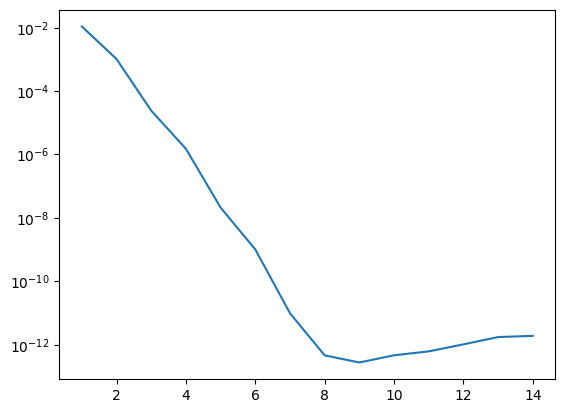

In [8]:
import matplotlib.pyplot as plt
n,err = zip(*errlist)
plt.yscale('log')
plt.plot(n,err);

**Exercises:**

Extend MyHighOrderFESpace by high order quadrilateral elements.

http://www.numa.uni-linz.ac.at/Teaching/PhD/Finished/zaglmayr-diss.pdf, 
page 68 ff